## Set up dataset

 

## Set up model 

Set up a Keras model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [ ]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Getting fashionMNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2.3.0
4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#   printing size of dataset
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


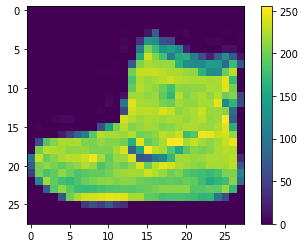

In [ ]:
#   visualizing an image from dataset

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

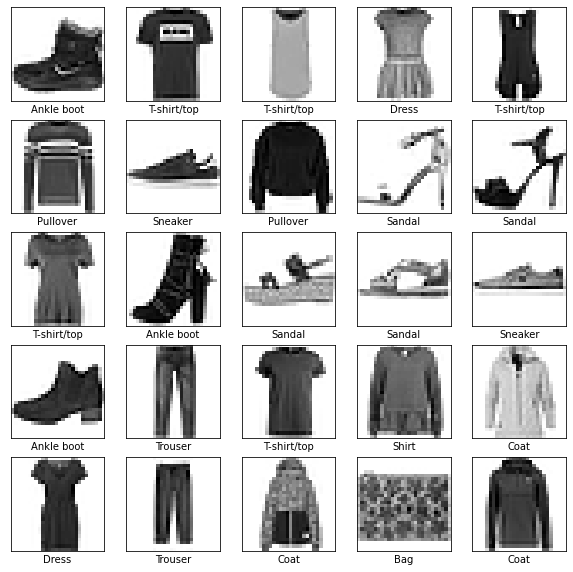

In [ ]:
#   normalizing data and plotting various examples

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#   creating model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#   compiling model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#   training model on 4000 training examples
history = model.fit(train_images[0:4000,:,:], train_labels[0:4000], epochs=10, validation_split=0.25)

Epoch 1/10
94/94 [==============================] - 0s 4ms/step - loss: 0.9716 - accuracy: 0.6680 - val_loss: 0.7193 - val_accuracy: 0.7410
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7833 - val_loss: 0.6126 - val_accuracy: 0.8020
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.8210 - val_loss: 0.5534 - val_accuracy: 0.8110
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8383 - val_loss: 0.5844 - val_accuracy: 0.8010
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8467 - val_loss: 0.5211 - val_accuracy: 0.8310
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8597 - val_loss: 0.5233 - val_accuracy: 0.8270
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8743 - val_loss: 0.5215 - val_accuracy: 0.8180
Epoch 8/10
94/94 [==

In [ ]:

#   testing accuracy on test datatest_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc*100)

313/313 - 0s - loss: 0.5172 - accuracy: 0.8212

Test accuracy: 82.12000131607056


In [ ]:
#    making predictions

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
predictions[0]

array([3.71638780e-05, 6.60801061e-06, 5.31361911e-05, 4.21199638e-06,
       1.79056093e-04, 7.50080496e-02, 1.28973086e-04, 1.26768783e-01,
       1.42473765e-02, 7.83566535e-01], dtype=float32)

In [ ]:
#   printing prediction nd actual ground truth
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


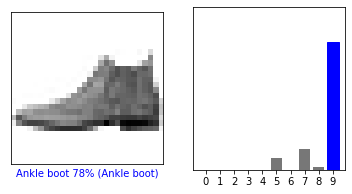

In [ ]:
#   plotting image and its predicted probabilities for each class

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

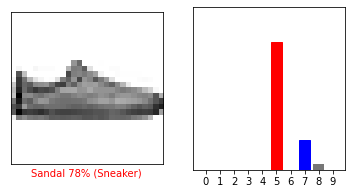

In [ ]:
#   plotting image and its predicted probabilities for each class for ith training example

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

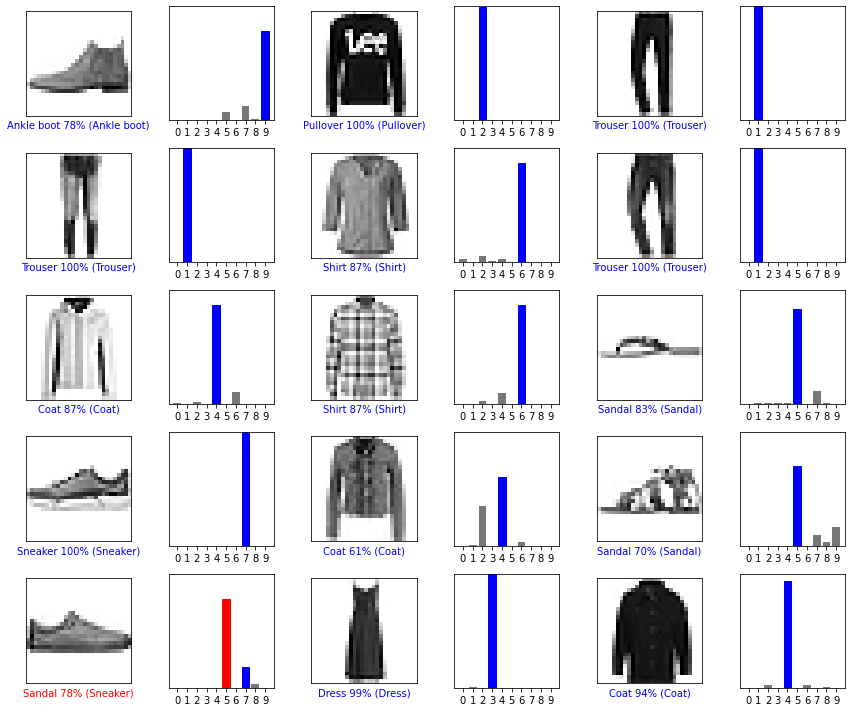

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

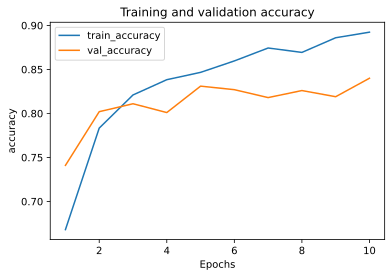

In [ ]:
#   plotting training and validation accuracy

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history, 'accuracy')

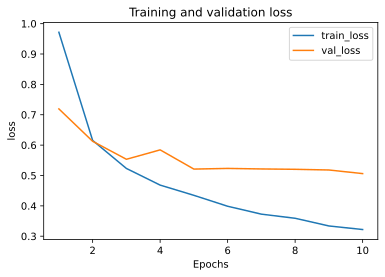

In [ ]:
#   plotting training and validation loss

plot_metric(history, 'loss')

### 2.  Regularisation experiment:  

Now select a type of regularisation (which may be L2, L1, L12, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [ ]:
# your code here 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

#   setting dropout rate
rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
val_acc = []
val_loss = []

#   fitting model for each different dropout rate
for i in range(len(rate)):
    Regularised_Model = keras.Sequential([
                                          keras.layers.Flatten(input_shape=(28, 28)),
                                          keras.layers.Dense(128, activation='relu'),
                                          Dropout(rate[i]),
                                          keras.layers.Dense(10)
                                          ])
    Regularised_Model.compile(optimizer='adam',
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=['accuracy'])
    Regularized_history = Regularised_Model.fit(train_images[0:4000,:,:], train_labels[0:4000], epochs=10, validation_split=0.25)

    val_loss.append(Regularized_history.history["val_loss"][9])
    val_acc.append(Regularized_history.history["val_accuracy"][9])

Epoch 1/10
94/94 [==============================] - 0s 3ms/step - loss: 1.0274 - accuracy: 0.6467 - val_loss: 0.7684 - val_accuracy: 0.7330
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7740 - val_loss: 0.7245 - val_accuracy: 0.7140
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8013 - val_loss: 0.6291 - val_accuracy: 0.7800
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.8257 - val_loss: 0.5598 - val_accuracy: 0.8050
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8410 - val_loss: 0.5337 - val_accuracy: 0.8180
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8463 - val_loss: 0.5103 - val_accuracy: 0.8320
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8567 - val_loss: 0.5041 - val_accuracy: 0.8200
Epoch 8/10
94/94 [==

In [ ]:
#   printing drop out rates and validation loss and validation accuray on it

print("Dropout rate", rate)
print("Validation loss", val_loss)
print("Validation accuracy", val_acc)

Dropout rate [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
Validation loss [0.49689981341362, 0.5010343790054321, 0.48583075404167175, 0.49067723751068115, 0.48628392815589905, 0.5009785890579224, 0.53111332654953, 0.5798556804656982]
Validation accuracy [0.8330000042915344, 0.8360000252723694, 0.8379999995231628, 0.8339999914169312, 0.8399999737739563, 0.8259999752044678, 0.8140000104904175, 0.7940000295639038]


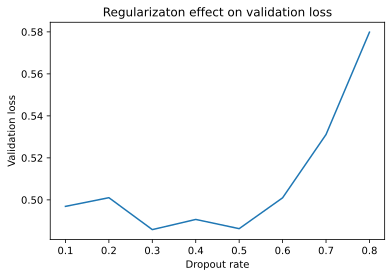

In [ ]:
#   plotting validation loss against each drop out rate
plt.plot(rate, val_loss )
plt.title('Regularizaton effect on validation loss')
plt.xlabel("Dropout rate")
plt.ylabel('Validation loss')
plt.show()

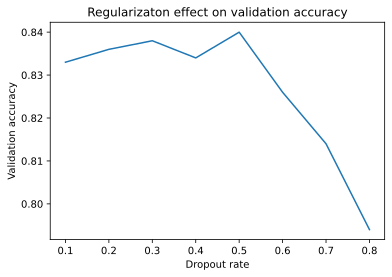

In [ ]:
#   plotting validation accuracy against each drop out rate

plt.plot(rate, val_acc)
plt.title('Regularizaton effect on validation accuracy')
plt.xlabel("Dropout rate")
plt.ylabel('Validation accuracy')
plt.show()

### 3.  Learning curve experiment:  

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [ ]:
# your code here 

#   specifying differend size for training data
data_size = [500, 1000, 2000, 4000, 8000, 16000, 32000, 60000]
val_lossLC = []
val_acc2LC = []


#   training model on different data sizes
for i in range(len(data_size)):
    Model3 = keras.Sequential([
                               keras.layers.Flatten(input_shape=(28, 28)),
                               keras.layers.Dense(128, activation='relu'),
                               Dropout(0.1),
                               keras.layers.Dense(10)
                               ])
    Model3.compile(optimizer='adam',
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=['accuracy'])
    history3 = Model3.fit(train_images[0:data_size[i],:,:], train_labels[0:data_size[i]], epochs=10, validation_split=0.25)

    val_lossLC.append(history3.history["val_loss"][9])
    val_acc2LC.append(history3.history["val_accuracy"][9])

Epoch 1/10
12/12 [==============================] - 0s 12ms/step - loss: 1.8077 - accuracy: 0.3787 - val_loss: 1.2098 - val_accuracy: 0.7120
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 1.0906 - accuracy: 0.6507 - val_loss: 0.8336 - val_accuracy: 0.7760
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.8465 - accuracy: 0.7093 - val_loss: 0.6818 - val_accuracy: 0.7920
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.7653 - val_loss: 0.6315 - val_accuracy: 0.8320
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.8027 - val_loss: 0.5896 - val_accuracy: 0.8080
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7947 - val_loss: 0.5850 - val_accuracy: 0.7920
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.8160 - val_loss: 0.6064 - val_accuracy: 0.8080
Epoch 8/10
12/12 [=

In [ ]:
#   printing drop out rate and validation loss and validation accuray on it

print("data size: ", data_size)
print("validation loss: ", val_lossLC)
print("validation accuracy: ", val_acc2LC)

data size:  [500, 1000, 2000, 4000, 8000, 16000, 32000, 60000]
validation loss:  [0.5509798526763916, 0.5871274471282959, 0.4824714958667755, 0.4711618423461914, 0.42910245060920715, 0.3908785581588745, 0.3344639837741852, 0.34785518050193787]
validation accuracy:  [0.800000011920929, 0.8040000200271606, 0.8420000076293945, 0.8349999785423279, 0.840499997138977, 0.8575000166893005, 0.8774999976158142, 0.8760666847229004]


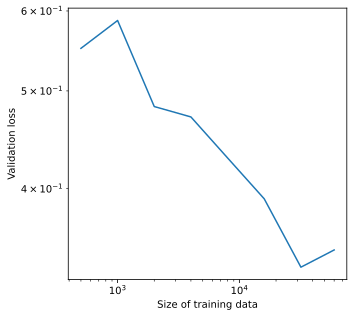

In [ ]:
#   plotting log-log plot on different data size and validation loss
plt.figure(figsize=(5, 5), dpi=70)
plt.xlabel("Size of training data")
plt.ylabel('Validation loss')
plt.loglog(data_size, val_lossLC)
plt.savefig("out.png")

Y = 1/X relation

where Y = validation loss and X is training dataseize

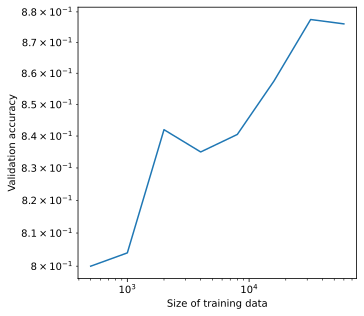

In [ ]:
#   plotting log-log plot on different data size and validation accuracy

plt.figure(figsize=(5, 5), dpi=70)
plt.xlabel("Size of training data")
plt.ylabel('Validation accuracy')
plt.loglog(data_size, val_acc2LC)
plt.savefig("out.pdf")

### 4. Second model:   

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeata sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [ ]:
# Further break training data into train / validation sets
(x_train, x_valid) = train_images[5000:], train_images[:5000] 
(y_train, y_valid) = train_labels[5000:], train_labels[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(test_labels, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [ ]:
#   creating second model (Convolutional Neural Network)

modelConv = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
modelConv.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
modelConv.add(tf.keras.layers.MaxPooling2D(pool_size=2))
modelConv.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelConv.add(tf.keras.layers.MaxPooling2D(pool_size=2))
modelConv.add(tf.keras.layers.Flatten())
modelConv.add(tf.keras.layers.Dense(256, activation='relu'))
modelConv.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
modelConv.summary()


modelConv.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#   training model on 4000 training data
modelConv.fit(x_train[:4000],
         y_train[:4000],
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [ ]:
# Evaluate the model on test set
score = modelConv.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 86.15999817848206


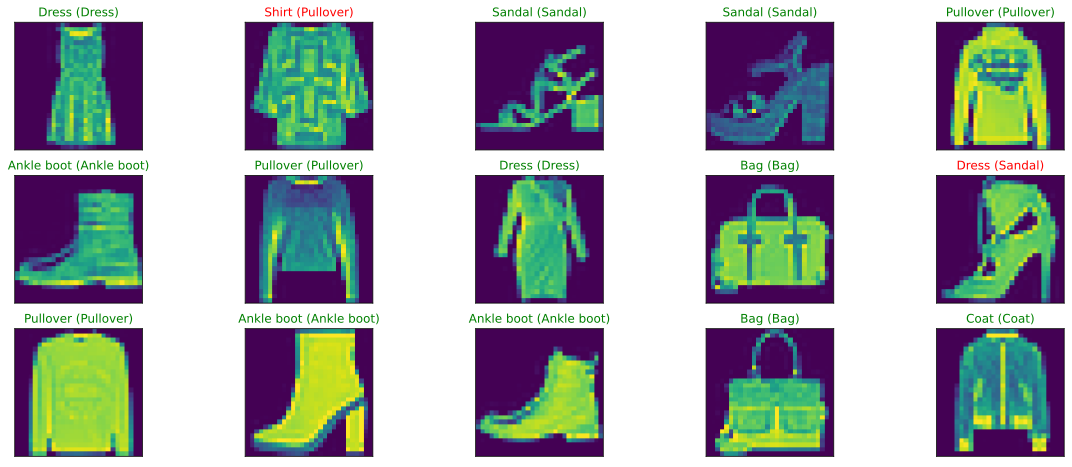

In [ ]:
#####prediction (and the groud truth label)####

y_hat = modelConv.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
#   Regularization using different drop out rates

rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
val_acc = []
val_loss = []

for i in range(len(rate)):
    model = tf.keras.Sequential()
    # Must define the input shape in the first layer of the neural network
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(rate[i]))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(rate[i]))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate[i]))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    Regularized_history =  model.fit(x_train[:4000], y_train[:4000], epochs=10, batch_size=64, validation_data=(x_valid, y_valid))


    val_loss.append(Regularized_history.history["val_loss"][9])
    val_acc.append(Regularized_history.history["val_accuracy"][9])

Epoch 1/10
63/63 [==============================] - 6s 92ms/step - loss: 1.0803 - accuracy: 0.6058 - val_loss: 0.6888 - val_accuracy: 0.7414
Epoch 2/10
63/63 [==============================] - 6s 90ms/step - loss: 0.6339 - accuracy: 0.7673 - val_loss: 0.5181 - val_accuracy: 0.8142
Epoch 3/10
63/63 [==============================] - 6s 89ms/step - loss: 0.5250 - accuracy: 0.8105 - val_loss: 0.4704 - val_accuracy: 0.8320
Epoch 4/10
63/63 [==============================] - 6s 92ms/step - loss: 0.4802 - accuracy: 0.8210 - val_loss: 0.4529 - val_accuracy: 0.8382
Epoch 5/10
63/63 [==============================] - 6s 89ms/step - loss: 0.4295 - accuracy: 0.8413 - val_loss: 0.4478 - val_accuracy: 0.8366
Epoch 6/10
63/63 [==============================] - 6s 88ms/step - loss: 0.4075 - accuracy: 0.8475 - val_loss: 0.4281 - val_accuracy: 0.8468
Epoch 7/10
63/63 [==============================] - 6s 89ms/step - loss: 0.3675 - accuracy: 0.8640 - val_loss: 0.4037 - val_accuracy: 0.8582
Epoch 8/10
63

In [ ]:
#   printing drop out rates and validation loss and validation accuray on it

print("Dropout rate", rate)
print("Validation loss", val_loss)
print("Validation accuracy", val_acc)

Dropout rate [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
Validation loss [0.4037885069847107, 0.3913131654262543, 0.41719532012939453, 0.407439261674881, 0.456028550863266, 0.5096321105957031, 0.5616564750671387, 0.7526113390922546]
Validation accuracy [0.8586000204086304, 0.8592000007629395, 0.8582000136375427, 0.8604000210762024, 0.8485999703407288, 0.8130000233650208, 0.7973999977111816, 0.7454000115394592]


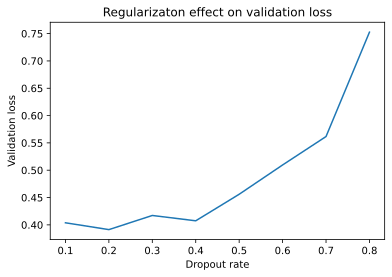

In [ ]:
#   plotting validation loss against each drop out rate

plt.plot(rate, val_loss )
plt.title('Regularizaton effect on validation loss')
plt.xlabel("Dropout rate")
plt.ylabel('Validation loss')
plt.show()

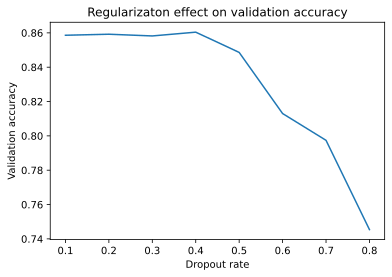

In [ ]:
#   plotting validation accuracy against each drop out rate

plt.plot(rate, val_acc)
plt.title('Regularizaton effect on validation accuracy')
plt.xlabel("Dropout rate")
plt.ylabel('Validation accuracy')
plt.show()

**Second model has better validation performance.**

In [ ]:
#   training model on different data sizes

# your code here 
data_size = [500, 1000, 2000, 4000, 8000, 16000, 32000, 60000]
val_lossLC2 = []
val_accLC2 = []

for i in range(len(data_size)):
    model = tf.keras.Sequential()
    # Must define the input shape in the first layer of the neural network
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    Regularized_history =  model.fit(x_train[:data_size[i]], y_train[:data_size[i]], epochs=10, batch_size=64, validation_data=(x_valid, y_valid))


    val_lossLC2.append(Regularized_history.history["val_loss"][9])
    val_accLC2.append(Regularized_history.history["val_accuracy"][9])

Epoch 1/10
8/8 [==============================] - 2s 247ms/step - loss: 2.0214 - accuracy: 0.2720 - val_loss: 1.6722 - val_accuracy: 0.3986
Epoch 2/10
8/8 [==============================] - 2s 227ms/step - loss: 1.4001 - accuracy: 0.4760 - val_loss: 1.1073 - val_accuracy: 0.5564
Epoch 3/10
8/8 [==============================] - 2s 229ms/step - loss: 1.0942 - accuracy: 0.5800 - val_loss: 1.0592 - val_accuracy: 0.5758
Epoch 4/10
8/8 [==============================] - 2s 226ms/step - loss: 1.0002 - accuracy: 0.6120 - val_loss: 0.9116 - val_accuracy: 0.6534
Epoch 5/10
8/8 [==============================] - 2s 228ms/step - loss: 0.9509 - accuracy: 0.6580 - val_loss: 0.8573 - val_accuracy: 0.7118
Epoch 6/10
8/8 [==============================] - 2s 228ms/step - loss: 0.8583 - accuracy: 0.6900 - val_loss: 0.8303 - val_accuracy: 0.6940
Epoch 7/10
8/8 [==============================] - 2s 227ms/step - loss: 0.8110 - accuracy: 0.7160 - val_loss: 0.7661 - val_accuracy: 0.7396
Epoch 8/10
8/8 [====

In [ ]:
#   printing each data sizee and its accuracy and loss on validation

print("data size: ", data_size)
print("validation loss: ", val_lossLC2)
print("validation accuracy: ", val_accLC2)

data size:  [500, 1000, 2000, 4000, 8000, 16000, 32000, 60000]
validation loss:  [0.6813309192657471, 0.5623993277549744, 0.4405273497104645, 0.38907429575920105, 0.35088789463043213, 0.28775784373283386, 0.2501451373100281, 0.21939502656459808]
validation accuracy:  [0.7454000115394592, 0.7897999882698059, 0.8432000279426575, 0.8636000156402588, 0.879800021648407, 0.8938000202178955, 0.9071999788284302, 0.920799970626831]


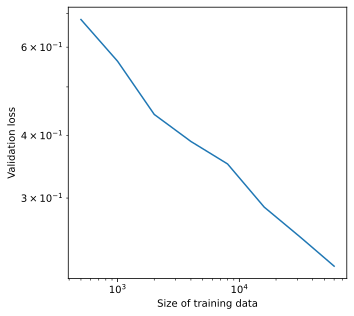

In [ ]:
#   plotting log-log plot on different data size and validation loss

plt.figure(figsize=(5, 5), dpi=70)
plt.xlabel("Size of training data")
plt.ylabel('Validation loss')
plt.loglog(data_size, val_lossLC2)
plt.savefig("out.png")

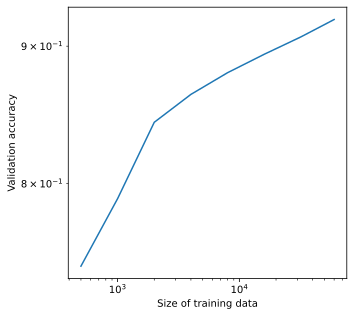

In [ ]:
#   plotting log-log plot on different data size and validation accuracy

plt.figure(figsize=(5, 5), dpi=70)
plt.xlabel("Size of training data")
plt.ylabel('Validation accuracy')
plt.loglog(data_size, val_accLC2)
plt.savefig("out.pdf")

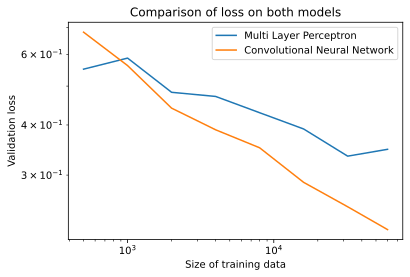

In [ ]:
#   plotting log-log plot on different data size and validation loss of both models to compare

plt.title('Comparison of loss on both models')
plt.xlabel("Size of training data")
plt.ylabel('Validation loss')
plt.loglog(data_size, val_lossLC,data_size, val_lossLC2)
plt.gca().legend(('Multi Layer Perceptron','Convolutional Neural Network'))
plt.show()

**Second model (Convolutional Neural Network) has rapid increase in performance with the increase in training data size**